In [1]:
#Import Packages
import numpy as np 
import pandas as pd # for working with dataframes
import seaborn as sns # for data visualization 

from matplotlib import pyplot as plt # for plotting
%matplotlib inline
sns.set_style("whitegrid")

import warnings # http://blog.johnmuellerbooks.com/2015/11/30/warnings-in-python-and-anaconda/
warnings.filterwarnings("ignore")

In [2]:
# Loading and Viewing Dataset
dataframe = pd.read_csv(r"C:\Users\user\Desktop\DATASETS\SpotifyFeatures_dvt.csv")
dataframe.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,04-Apr,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,04-Apr,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,05-Apr,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,04-Apr,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,04-Apr,0.390


In [5]:
dataframe.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [13]:
print(dataframe.keys())

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')


In [6]:
#Cleaning Null Values
pd.isnull(dataframe).sum()
#Since there are no null values, we don't have to worry about filling in missing information.

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

Text(0.5, 1.0, 'Popularity Distribution')

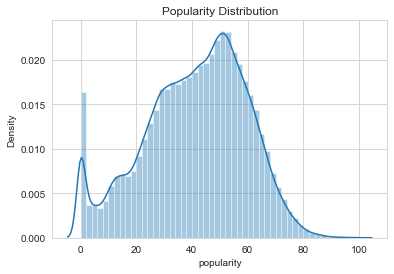

In [13]:
#overall trends in the data to get a good idea of which variables correlate with each other as well as other associations.
#Exploratory Analysis
sns.distplot(dataframe['popularity']).set_title('Popularity Distribution')

In [6]:
dataframe.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.381295,0.256564,0.002348,0.248922,-0.210983,-0.167995,0.363011,-0.151076,0.081039,0.060076
acousticness,-0.381295,1.000000,-0.364546,0.011203,-0.725576,0.316154,0.069004,-0.690202,0.150935,-0.238247,-0.325798
danceability,0.256564,-0.364546,1.000000,-0.125781,0.325807,-0.364941,-0.041684,0.438668,0.134560,0.021939,0.547154
duration_ms,0.002348,0.011203,-0.125781,1.000000,-0.030550,0.076021,0.023783,-0.047618,-0.016171,-0.028456,-0.141811
energy,0.248922,-0.725576,0.325807,-0.030550,1.000000,-0.378957,0.192801,0.816088,0.145120,0.228774,0.436771
instrumentalness,-0.210983,0.316154,-0.364941,0.076021,-0.378957,1.000000,-0.134198,-0.506320,-0.177147,-0.104133,-0.307522
liveness,-0.167995,0.069004,-0.041684,0.023783,0.192801,-0.134198,1.000000,0.045686,0.510147,-0.051355,0.011804
loudness,0.363011,-0.690202,0.438668,-0.047618,0.816088,-0.506320,0.045686,1.000000,-0.002273,0.228364,0.399901
speechiness,-0.151076,0.150935,0.134560,-0.016171,0.145120,-0.177147,0.510147,-0.002273,1.000000,-0.081541,0.023842
tempo,0.081039,-0.238247,0.021939,-0.028456,0.228774,-0.104133,-0.051355,0.228364,-0.081541,1.000000,0.134857


Text(0.5, 1.0, 'Popularity Based on Time Signature')

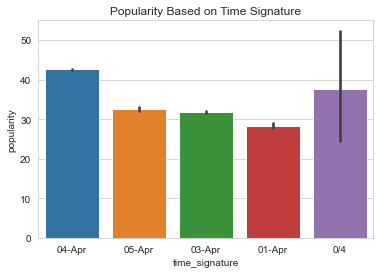

In [7]:
sns.barplot(x = 'time_signature', y = 'popularity', data = dataframe)
plt.title('Popularity Based on Time Signature')

Text(0.5, 1.0, 'Popularity Based on Key')

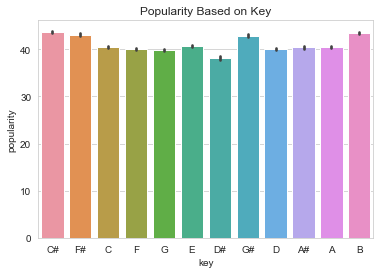

In [8]:
sns.barplot(x = 'key', y = 'popularity', data = dataframe)
plt.title('Popularity Based on Key')

Text(0.5, 1.0, 'Popularity Based on Mode')

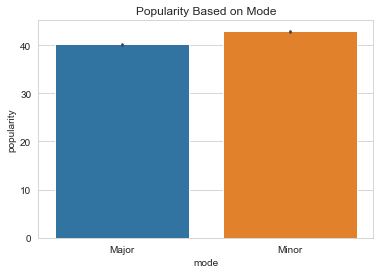

In [9]:
sns.barplot(x = 'mode', y = 'popularity', data = dataframe)
plt.title('Popularity Based on Mode')

Text(0.5, 1.0, 'Popularity Based on Mode and Key')

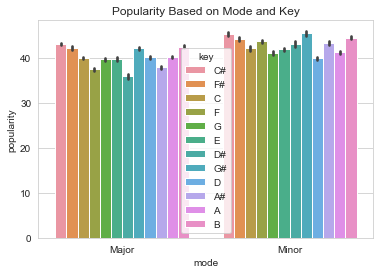

In [10]:
sns.barplot(x = 'mode', y = 'popularity', hue = 'key', data = dataframe)
plt.title('Popularity Based on Mode and Key')

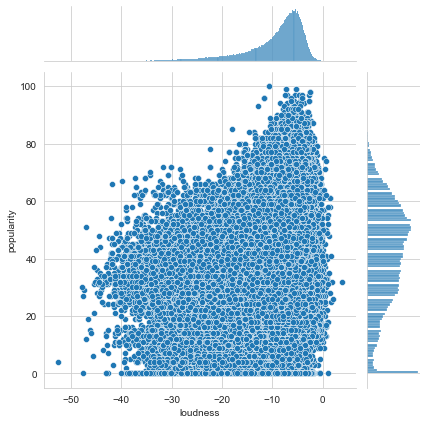

In [11]:
sns.jointplot(x = 'loudness', y = 'popularity', data = dataframe)

Text(0.5, 1.0, 'Acoustiness for Songs with More than 50 Popularity')

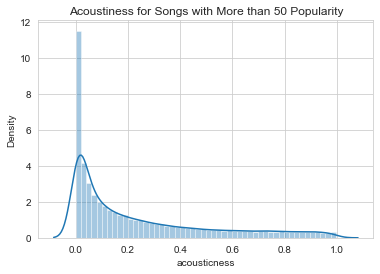

In [12]:
popular_above_50 = dataframe[dataframe.popularity > 50]
sns.distplot(popular_above_50['acousticness'])
plt.title('Acoustiness for Songs with More than 50 Popularity')

Text(0.5, 1.0, 'Acoustiness for Songs with Less than 50 Popularity')

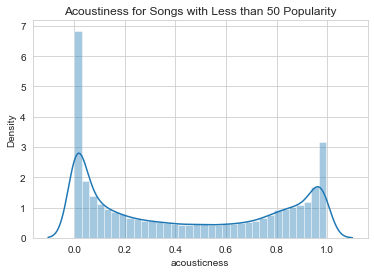

In [13]:
popular_below_50 = dataframe[dataframe.popularity < 50]
sns.distplot(popular_below_50['acousticness'])
plt.title('Acoustiness for Songs with Less than 50 Popularity')

Text(0.5, 1.0, 'Loudness for Songs with More than 50 Popularity')

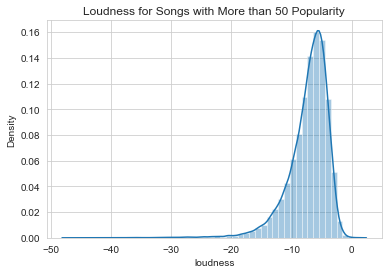

In [14]:
sns.distplot(popular_above_50['loudness'])
plt.title('Loudness for Songs with More than 50 Popularity')
 

Text(0.5, 1.0, 'Loudness for Songs with Less than 50 Popularity')

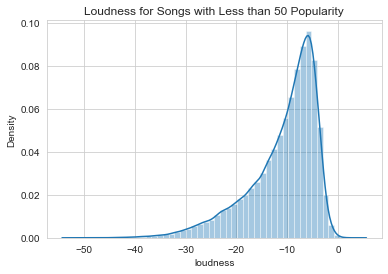

In [15]:
popular_below_50 = dataframe[dataframe.popularity < 50]
sns.distplot(popular_below_50['loudness'])
plt.title('Loudness for Songs with Less than 50 Popularity')

In [17]:
list_of_keys = dataframe['key'].unique()
for i in range(len(list_of_keys)):
    dataframe.loc[dataframe['key'] == list_of_keys[i], 'key'] = i
dataframe.sample(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
228581,Soul,ford.,Slack,72fuu9qDb0xXCH9vIaeJGa,41,0.137000,0.777,192000,0.577,0.888000,2,0.251,-5.595,Major,0.0556,95.018,04-Apr,0.392
6429,Alternative,Gorillaz,Doncamatic (feat. Daley),7twVmetQlugzgUqdMNjdJ4,44,0.090300,0.893,202067,0.480,0.000000,10,0.102,-5.493,Major,0.0560,123.980,04-Apr,0.968
14015,Dance,Anne-Marie,Perfect to Me - Back N Fourth Remix,2EJkm2x6om5M00CwMduA9G,0,0.029300,0.713,211093,0.794,0.000838,3,0.164,-6.126,Minor,0.0581,123.979,04-Apr,0.585
193128,Soul,The Dells,Oh What A Night,2CUoziiS4i5VRaobtWsWeB,51,0.924000,0.363,171978,0.321,0.002110,4,0.784,-10.015,Major,0.0297,110.973,03-Apr,0.374
24435,Electronic,Barely Alive,Basement Dwellers,586808josoG1wZM84nMv39,42,0.000785,0.681,215200,0.905,0.003260,0,0.910,-4.162,Major,0.2920,75.006,04-Apr,0.493


In [24]:
#We will assign major = 1 and minor = 0.
dataframe.loc[dataframe["mode"] == 'Major', "mode"] = 1
dataframe.loc[dataframe["mode"] == 'Minor', "mode"] = 0
dataframe.sample(15)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
132549,Reggae,"Nas & Damian ""Jr. Gong"" Marley",Count Your Blessings,4Jck5CCjzWoeNqkLFFkqaF,33,0.00266,0.703,263933,0.7420,0.000000,11,0.1130,-3.992,0,0.1710,101.105,0,0.3540
213562,Country,Dan + Shay,I Heard Goodbye,3EcFVfHd0XJdr0M33uVZco,55,0.71800,0.474,221733,0.3860,0.000000,0,0.1230,-7.924,1,0.0297,138.022,0,0.2720
194468,Movie,Bruno Pelletier,S.O.S. d'un terrien en détresse,6VqnApcQD33DoK1oXvXcIW,20,0.71500,0.269,217093,0.1930,0.024100,1,0.1080,-11.398,0,0.0420,115.521,0,0.1440
31395,Anime,Yuki Hayashi,エンデヴァーの力,2VlrMkdSa9yJRyihWh0zmT,20,0.00731,0.379,160053,0.7790,0.966000,3,0.1200,-9.472,0,0.0748,95.040,0,0.1220
217411,World,All Sons & Daughters,Almighty God,75XSKhoy3Nnpk5cxF8rFhb,33,0.84400,0.466,308553,0.2230,0.000000,10,0.3380,-14.113,1,0.0286,129.896,0,0.1340
37680,Electronic,Thievery Corporation,Blasting Through the City,6MJolAmoTcNjI5Y4D8WSTh,35,0.04710,0.697,213680,0.6810,0.036100,10,0.2160,-7.889,0,0.0495,137.935,0,0.5760
150838,Pop,Crash Test Dummies,Mmm Mmm Mmm Mmm,76nvqWPFucUra1xCkN1tnD,58,0.25000,0.580,235173,0.5750,0.000018,6,0.0813,-7.720,1,0.0231,92.934,0,0.3700
43553,Folk,Lily Allen,Littlest Things,16tU7M0qquqkou1MnipA9h,46,0.66000,0.283,187413,0.7010,0.000002,5,0.1110,-7.595,0,0.1350,165.752,0,0.5640
29599,Anime,Hironobu Kageyama,We Gotta Power - 2005 ver./DRAGON BALL Z Openi...,08FM8w06gUVnGs1oqE2wZ7,31,0.00179,0.467,232680,0.9290,0.000000,10,0.2580,-5.067,1,0.0769,169.953,0,0.7030
55688,Movie,Bruno Pelletier,Vivre sa vie,3SD6aWHaIRevBnG4eIWtNH,5,0.02650,0.387,292973,0.6420,0.000000,11,0.9430,-4.951,0,0.0303,141.895,0,0.1230


In [23]:
list_of_time_signatures = dataframe['time_signature'].unique()
for i in range(len(list_of_time_signatures)):
    dataframe.loc[dataframe['time_signature'] == list_of_time_signatures[i], 'time_signature'] = i
dataframe.sample(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
64897,Folk,The Mountain Goats,The Mess Inside,3B7a3OW9h51WJKYQXD5IAo,40,0.87400,0.646,215587,0.674,0.016800,4,0.340,-7.461,1,0.0458,110.960,0,0.601
91453,Hip-Hop,Caleborate,4 Willem,4nWPmn1tqegITYKdZOJpKv,52,0.35600,0.708,339471,0.583,0.000000,0,0.101,-7.847,0,0.4060,82.105,0,0.676
78853,Children’s Music,Breaking Benjamin,So Cold - Remix,4BJyt25nburVwbnESDeIc7,60,0.00274,0.478,273440,0.788,0.000058,2,0.119,-5.438,0,0.0754,153.018,0,0.326
83147,Opera,Jean-Baptiste Lully,"Le Divertissement Royal de Versailles, LWV 38:...",7FUBtY3z2H4CIjcKe8grVH,13,0.83800,0.499,106107,0.389,0.835000,3,0.219,-15.861,0,0.0366,100.235,0,0.434
18620,Dance,Todrick Hall,Low,2TqWayWYGNjqfTpapyveyu,53,0.13300,0.811,201905,0.894,0.000002,4,0.317,-3.547,1,0.0916,126.034,0,0.624


In [25]:
dataframe.loc[dataframe['popularity'] < 57, 'popularity'] = 0 
dataframe.loc[dataframe['popularity'] >= 57, 'popularity'] = 1
dataframe.loc[dataframe['popularity'] == 1]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
135,R&B,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,1,0.08300,0.724,246333,0.689,0.000000,8,0.3040,-5.922,0,0.1350,146.496,0,0.6930
136,R&B,Rihanna,Desperado,6KFaHC9G178beAp7P0Vi5S,1,0.32300,0.685,186467,0.610,0.000000,2,0.1020,-5.221,0,0.0439,94.384,2,0.3230
137,R&B,Yung Bleu,Ice On My Baby (feat. Kevin Gates) - Remix,6muW8cSjJ3rusKJ0vH5olw,1,0.06750,0.762,199520,0.520,0.000004,3,0.1140,-5.237,0,0.0959,75.047,0,0.0862
138,R&B,Surfaces,Heaven Falls / Fall on Me,7yHqOZfsXYlicyoMt62yC6,1,0.36000,0.563,240597,0.366,0.002430,11,0.0955,-6.896,0,0.1210,85.352,0,0.7680
139,R&B,Olivia O'Brien,Love Myself,4XzgjxGKqULifVf7mnDIQK,1,0.59600,0.653,213947,0.621,0.000000,11,0.0811,-5.721,0,0.0409,100.006,0,0.4660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230312,Soul,James Brown,Get Up (I Feel Like Being A) Sex Machine - Pts...,6hpmTwgNCz81H2bFEREx29,1,0.27300,0.833,318800,0.661,0.000149,9,0.2940,-7.595,0,0.1010,108.314,0,0.8580
230782,Soul,Alex Hepburn,If You Stay,4sJoIeb8zWYCLHSLM0az3b,1,0.04530,0.719,194554,0.702,0.000013,11,0.0662,-4.577,1,0.0357,116.938,0,0.6130
230817,Soul,Paloma Faith,Make Your Own Kind of Music,5jsFFhABp2FkasGr4QcQd6,1,0.00862,0.567,163840,0.753,0.001830,5,0.1270,-4.823,1,0.0406,120.098,0,0.5660
230946,Soul,James Brown,Papa's Got A Brand New Bag - Pt. 1,5aZzmPUv5a2nna9sxBrmpL,1,0.51900,0.775,128973,0.725,0.054100,5,0.0944,-8.369,1,0.0944,129.681,0,0.9140


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [54]:
features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness", 
            "mode", "speechiness", "tempo", "time_signature", "valence"]

In [55]:
#Next we define 80% of the dataframe for training and 20% of the dataframe for testing.
training = dataframe.sample(frac = 0.8,random_state = 420)
X_train = training[features]
y_train = training['popularity']
X_test = dataframe.drop(training.index)[features]

In [56]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 420)

In [57]:
LR_Model = LogisticRegression()
LR_Model.fit(X_train, y_train)
LR_Predict = LR_Model.predict(X_valid)
LR_Accuracy = accuracy_score(y_valid, LR_Predict)
print("Accuracy: " + str(LR_Accuracy))

LR_AUC = roc_auc_score(y_valid, LR_Predict) 
print("AUC: " + str(LR_AUC))

Accuracy: 0.7895316360511333
AUC: 0.5


In [62]:
RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_valid)
RFC_Accuracy = accuracy_score(y_valid, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

RFC_AUC = roc_auc_score(y_valid, RFC_Predict) 
print("AUC: " + str(RFC_AUC))


Accuracy: 0.9217692555591364
AUC: 0.8337568982161686


In [63]:
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train, y_train)
KNN_Predict = KNN_Model.predict(X_valid)
KNN_Accuracy = accuracy_score(y_valid, KNN_Predict)
print("Accuracy: " + str(KNN_Accuracy))

KNN_AUC = roc_auc_score(y_valid, KNN_Predict) 
print("AUC: " + str(KNN_AUC))

Accuracy: 0.7736330432914383
AUC: 0.6156631913174396


In [64]:
DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train, y_train)
DT_Predict = DT_Model.predict(X_valid)
DT_Accuracy = accuracy_score(y_valid, DT_Predict)
print("Accuracy: " + str(DT_Accuracy))

DT_AUC = roc_auc_score(y_valid, DT_Predict) 
print("AUC: " + str(DT_AUC))

Accuracy: 0.852615748200666
AUC: 0.8122361417219499


In [66]:
model_performance_accuracy = pd.DataFrame({'Model': ['LogisticRegression', 
                                                      'RandomForestClassifier', 
                                                      'KNeighborsClassifier',
                                                      'DecisionTreeClassifier'],
                                            'Accuracy': [LR_Accuracy,
                                                         RFC_Accuracy,
                                                         KNN_Accuracy,
                                                         DT_Accuracy]})

model_performance_AUC = pd.DataFrame({'Model': ['LogisticRegression', 
                                                      'RandomForestClassifier', 
                                                      'KNeighborsClassifier',
                                                      'DecisionTreeClassifier'],
                                            'AUC': [LR_AUC,
                                                         RFC_AUC,
                                                         KNN_AUC,
                                                         DT_AUC]})

In [67]:
model_performance_accuracy.sort_values(by = "Accuracy", ascending = False)

,Model,Accuracy
1,RandomForestClassifier,0.921769
3,DecisionTreeClassifier,0.852616
0,LogisticRegression,0.789532
2,KNeighborsClassifier,0.773633


In [68]:
model_performance_AUC.sort_values(by = "AUC", ascending = False)

,Model,AUC
1,RandomForestClassifier,0.833757
3,DecisionTreeClassifier,0.812236
2,KNeighborsClassifier,0.615663
0,LogisticRegression,0.500000


In [ ]:
#The Random Forest Classifier was the best performing algorithm with 92.0% accuracy and 86.4% AUC.
#The Decision Tree Classifier was the second best performing algorithm with 87.5% accuracy and 85.8% AUC.

In [ ]:
#OBEJCTIVE 2

In [1]:
import numpy as np # linear algebra
import pandas as pd

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [8]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [9]:
#Importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
df=pd.read_excel(r"C:\Users\user\Desktop\Spotify_data_2.xlsx")
df

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,None,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,None,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,None,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,None,None,None,None,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,None,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,20-35,Female,More than 2 years,"Smartphone, Computer or laptop, Wearable devices",Free (ad-supported),Yes,Student Plan-Rs 59/month,Music,Pop,Morning,"Uplifting and motivational, Sadness or melancholy",While Traveling,recommendations,5,Rarely,Lifestyle and Health,Conversational,Both,Shorter,Ok
516,20-35,Female,More than 2 years,"Smartphone, Computer or laptop",Free (ad-supported),Yes,Student Plan-Rs 59/month,Music,Pop,Night,"Relaxation and stress relief, Uplifting and mo...","While Traveling, Workout session, leisure time",Others,2,Rarely,Comedy,Story telling,Both,Shorter,Ok
517,20-35,Female,More than 2 years,Smartphone,Free (ad-supported),No,Student Plan-Rs 59/month,Music,Pop,Night,Relaxation and stress relief,leisure time,recommendations,3,Never,None,Story telling,Both,Shorter,Ok
518,20-35,Female,6 months to 1 year,Smartphone,Premium (paid subscription),Yes,Individual Plan- Rs 119/ month,Music,Melody,Night,"Relaxation and stress relief, Uplifting and mo...","Workout session, leisure time","recommendations, Others",2,Several times a week,Comedy,Conversational,Both,Longer,Satisfied


In [10]:
#Creating a copy for Clustering
df1=df.copy()

In [11]:
#Checking Datatypes
df.dtypes

Age                            object
Gender                         object
spotify_usage_period           object
spotify_listening_device       object
spotify_subscription_plan      object
premium_sub_willingness        object
preffered_premium_plan         object
preferred_listening_content    object
fav_music_genre                object
music_time_slot                object
music_Influencial_mood         object
music_lis_frequency            object
music_expl_method              object
music_recc_rating               int64
pod_lis_frequency              object
fav_pod_genre                  object
preffered_pod_format           object
pod_host_preference            object
preffered_pod_duration         object
pod_variety_satisfaction       object
dtype: object

In [12]:
#Checking Missing Values
df.isna().sum()

Age                            0
Gender                         0
spotify_usage_period           0
spotify_listening_device       0
spotify_subscription_plan      0
premium_sub_willingness        0
preffered_premium_plan         0
preferred_listening_content    0
fav_music_genre                0
music_time_slot                0
music_Influencial_mood         0
music_lis_frequency            0
music_expl_method              0
music_recc_rating              0
pod_lis_frequency              0
fav_pod_genre                  0
preffered_pod_format           0
pod_host_preference            0
preffered_pod_duration         0
pod_variety_satisfaction       0
dtype: int64

In [ ]:
#EDA PROCESS

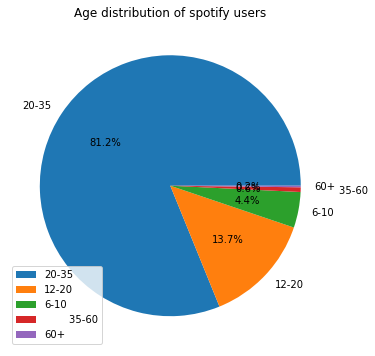

In [17]:
#Age group
y=df['Age'].value_counts()
plt.figure(figsize=(6,6))
labels=['20-35','12-20','6-10','        35-60','60+']
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('Age distribution of spotify users')
plt.show()

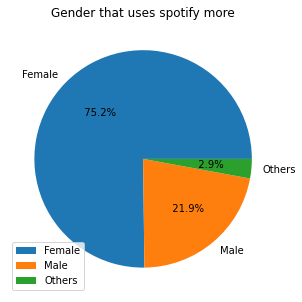

In [20]:
#Gender
y=df['Gender'].value_counts()
plt.figure(figsize=(5,5))
labels=['Female','Male','Others']
plt.pie(y,labels=labels,autopct='  %1.1f%%')
plt.legend(loc='lower left')
plt.title('Gender that uses spotify more')
plt.show()

<AxesSubplot:xlabel='spotify_subscription_plan', ylabel='count'>

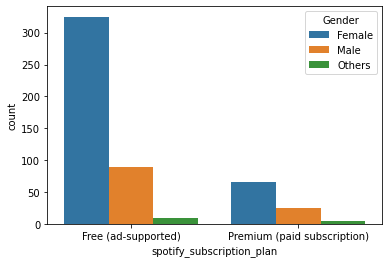

In [21]:
#spotify subscription plan
sns.countplot(x='spotify_subscription_plan',data=df,hue='Gender')

<AxesSubplot:xlabel='premium_sub_willingness', ylabel='count'>

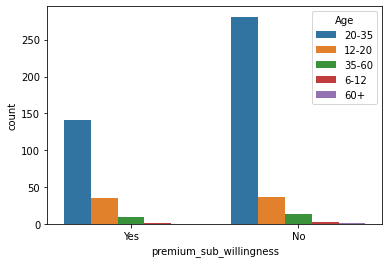

In [22]:
#willingness to take subscription
sns.countplot(x='premium_sub_willingness',data=df,hue='Age')

<AxesSubplot:xlabel='premium_sub_willingness', ylabel='count'>

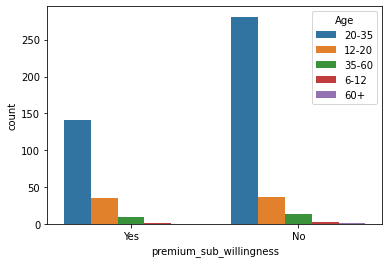

In [23]:
#willingness to take subscription
sns.countplot(x='premium_sub_willingness',data=df,hue='Age')

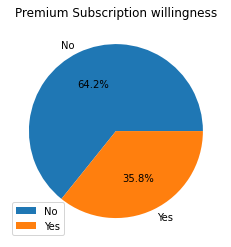

In [24]:
#Premium Subscription willingness
y3=df['premium_sub_willingness'].value_counts()
labels=['No','Yes']
plt.pie(y3,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('Premium Subscription willingness')
plt.show()

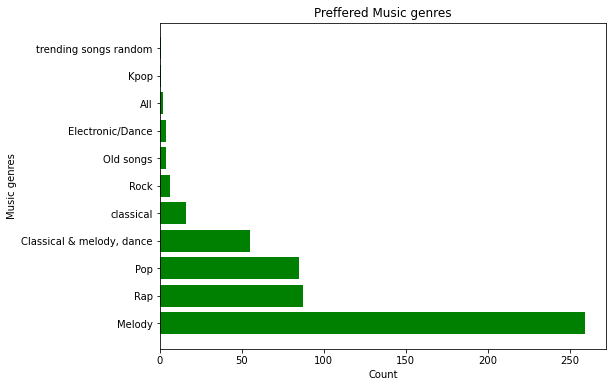

In [25]:
#fav genre
fig,ax=plt.subplots(figsize=(8,6))
y2=df['fav_music_genre'].value_counts().values
x2=df['fav_music_genre'].unique()
plt.barh(x2,y2,color='g')
plt.xlabel('Count')
plt.ylabel('Music genres')
plt.title('Preffered Music genres')
plt.show()

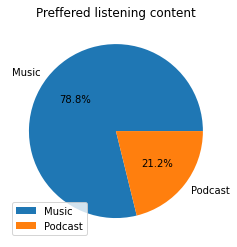

In [26]:
#fav lis content
y3=df['preferred_listening_content'].value_counts()
labels=['Music','Podcast']
plt.pie(y3,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('Preffered listening content')
plt.show()

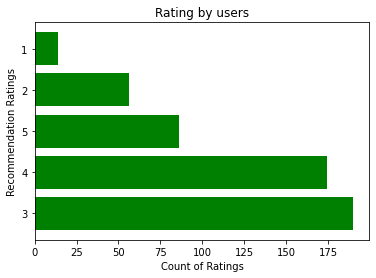

In [27]:
#music recommendation rating
y4=df['music_recc_rating'].value_counts().values
x4=['3','4','5','2','1']
plt.barh(x4,y4,color='g')
plt.xlabel('Count of Ratings')
plt.ylabel('Recommendation Ratings')
plt.title('Rating by users')
plt.show()